In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse as sp
import szegedy_QW as SQW 
import sys
sys.path.append('../read_datasets')
import entropy as ent

In [2]:
def get_node_prob(alpha,N,step):
    alpha = (U**step)*alpha
    p_sum = sp.csr_matrix((N,1))
    for k in range(N):
            p_sum += (sp.csr_matrix(sp.kron(b_vec,b_vec[:,k]).T*alpha)).power(2)
    return p_sum.todense()

In [3]:
G = nx.DiGraph()
G.add_edges_from(np.loadtxt('../dataset/'+'prices_model_n20_m3_k01_initial_nodes1_p1.0_iteration1.txt'))
A = nx.adjacency_matrix(G)

/tmp/ipykernel_6241/2455919684.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [4]:
U,b_vec,psi=SQW.SQW_unitary_new(A.todense())
alpha =np.sum(psi.todense(),1)/np.sqrt(psi.shape[1])


/home/anton/anaconda3/envs/AQA/lib/python3.10/site-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


### Probability dist step 0

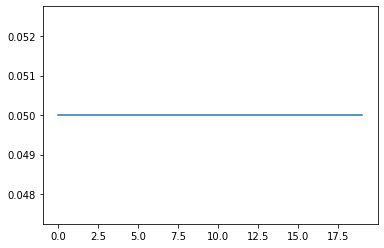

In [5]:
plt.plot(range(20),get_node_prob(alpha,20,0))
plt.show()

### Probability dist step 1

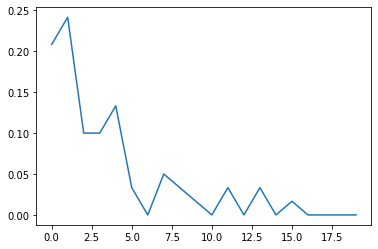

In [6]:
plt.plot(range(20),get_node_prob(alpha,20,1))
plt.show()

### Probability dist step 2

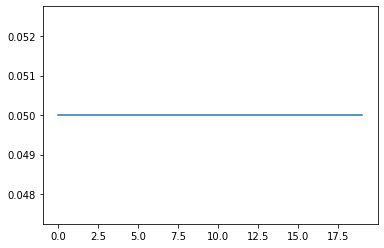

In [7]:
plt.plot(range(20),get_node_prob(alpha,20,2))
plt.show()

### Probability dist step 3

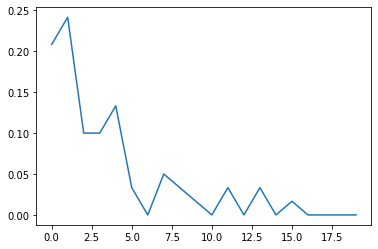

In [9]:
plt.plot(range(20),get_node_prob(alpha,20,3))
plt.show()

In [10]:
p_test = SQW.average_dist(G,4500)

/home/anton/MsC/semester2/Special_Topics/special-topic-cse/quantum-walk/szegedy_QW.py:109: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()
/home/anton/anaconda3/envs/AQA/lib/python3.10/site-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


## Stationary quantum average probability

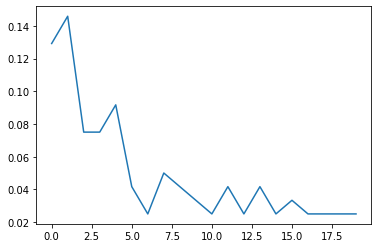

In [11]:
plt.plot(range(20),p_test.todense())
plt.show()

## Classical vs Quantum

In [13]:
qstar = ent.weightedev(ent.transmatrix(A.todense()))

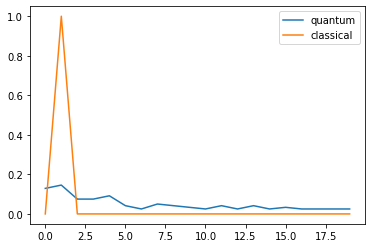

In [15]:
plt.plot(range(20),p_test.todense(),label='quantum')
plt.plot(range(20),qstar,label='classical')
plt.legend()
plt.show()